There are two common disease in potato
1. Early Blight
2. Late Blight

Early Blight is caused by fungas.

There will be three classfication for our supervised data learning.
1. Healthy
2. Early Blight
3. Late Blight

We will also doing data augmentation.

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNESL = 3

tfdataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

Found 2103 files belonging to 3 classes.


In [4]:
print(tfdataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
classes = tfdataset.class_names

In [6]:
print(classes)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [7]:
len(tfdataset)

66

In [9]:
for image_batch, label_batch in tfdataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 0 0 2 0 0 1 0 0 1 2 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0]


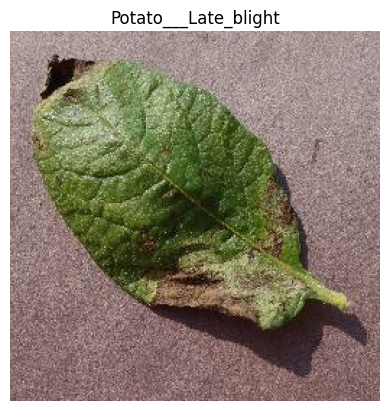

In [16]:
for image_batch, label_batch in tfdataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(classes[label_batch[0]])

In [17]:
# we will keep 80%  data for training. 10% for validation. 10% for the test

In [19]:
train_size = int(0.8 * len(tfdataset))
val_size = int(0.1 * len(tfdataset))
test_size = len(tfdataset) - train_size - val_size

In [20]:
train = tfdataset.take(train_size)
val = tfdataset.skip(train_size).take(val_size)
test = tfdataset.skip(train_size + val_size)

In [24]:
len(train)

52

In [25]:
len(val)

6

In [26]:
len(test)

8

In [40]:
train_ds = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [41]:
## Resize and rescale input layer
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

resize_and_rescale = Sequential()
resize_and_rescale.add(layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
resize_and_rescale.add(layers.Rescaling(1. / 255))

In [42]:
data_augmentation = Sequential()
data_augmentation.add(layers.RandomFlip("horizontal_and_vertical"))
data_augmentation.add(layers.RandomRotation(0.2))

In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(resize_and_rescale)
model.add(data_augmentation)

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3)) 

In [45]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_11 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,899 (909.76 KB)

 Trainable params: 232,899 (909.76 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.4894 - loss: 0.9286 - val_accuracy: 0.5781 - val_loss: 0.7858
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6919 - loss: 0.7004 - val_accuracy: 0.8021 - val_loss: 0.5202
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 49s 941ms/step - accuracy: 0.7985 - loss: 0.4784 - val_accuracy: 0.8021 - val_loss: 0.4639
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 46s 878ms/step - accuracy: 0.8485 - loss: 0.3691 - val_accuracy: 0.8594 - val_loss: 0.3773
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 51s 983ms/step - accuracy: 0.8907 - loss: 0.2946 - val_accuracy: 0.9323 - val_loss: 0.1911
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9304 - loss: 0.1786 - val_accuracy: 0.8906 - val_loss: 0.2458
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 43s 826ms/step - accuracy: 0.9174 - loss: 0.1940 - val_accuracy: 0.9375 - val_loss: 0.1695
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 42s 815ms/step - accuracy: 0.9315 - loss: 0.1570 - val_accuracy: 0.

In [71]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.9851 - loss: 0.0256


In [72]:
print(scores)

[0.02266818657517433, 0.9878542423248291]


In [73]:
history

In [74]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 52}

In [75]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [76]:
history.history['accuracy']

[0.512620210647583,
 0.7319711446762085,
 0.8137019276618958,
 0.862379789352417,
 0.8756009340286255,
 0.9152644276618958,
 0.9308894276618958,
 0.932692289352417,
 0.9375,
 0.9513221383094788,
 0.9447115659713745,
 0.9645432829856873,
 0.9573317170143127,
 0.9615384340286255,
 0.9597355723381042,
 0.9567307829856873,
 0.9693509340286255,
 0.9621394276618958,
 0.9633413553237915,
 0.9603365659713745,
 0.9693509340286255,
 0.9741586446762085,
 0.9675480723381042,
 0.9705528616905212,
 0.9627403616905212,
 0.9771634340286255,
 0.979567289352417,
 0.9897836446762085,
 0.9819711446762085,
 0.9909855723381042,
 0.9825721383094788,
 0.9831730723381042,
 0.9861778616905212,
 0.9819711446762085,
 0.9885817170143127,
 0.9825721383094788,
 0.989182710647583,
 0.995192289352417,
 0.9939903616905212,
 0.9807692170143127,
 0.9861778616905212,
 0.9861778616905212,
 0.9945913553237915,
 0.981370210647583,
 0.9651442170143127,
 0.9789663553237915,
 0.9945913553237915,
 0.9975961446762085,
 0.98737978

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

First Image to predict
Label of first image:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
[6.2570798e-08 9.9966657e-01 3.3338525e-04]
Predicted Label:  Potato___Late_blight


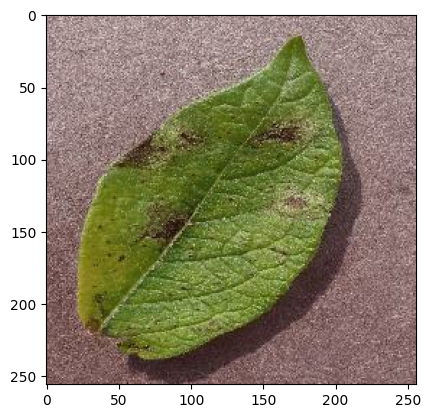

In [90]:
import numpy as np

for images_batch, label_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print("First Image to predict")
    plt.imshow(first_image)
    print("Label of first image: ", classes[first_label])

    batch_pred = model.predict(image_batch)
    print(batch_pred[0])
    print("Predicted Label: ", classes[np.argmax(batch_pred[0])])

In [91]:
model.predict(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step


array([[9.99974132e-01, 2.58128202e-05, 5.53630065e-17],
       [1.50476581e-06, 9.99985099e-01, 1.34218235e-05],
       [9.99997497e-01, 2.56097496e-06, 1.80438787e-14],
       [9.99993801e-01, 6.16541047e-06, 6.32555315e-13],
       [9.99999881e-01, 7.73529223e-08, 1.40041833e-19],
       [1.00000000e+00, 1.93864462e-08, 2.82937017e-23],
       [5.21762304e-05, 9.99944925e-01, 2.90499065e-06],
       [5.89243931e-10, 6.23506725e-01, 3.76493245e-01],
       [1.28430116e-07, 9.99999881e-01, 9.91705416e-12],
       [9.99999762e-01, 2.22282424e-07, 1.02824241e-15],
       [1.00000000e+00, 2.46912357e-09, 7.41662622e-28],
       [2.11688248e-03, 9.97883141e-01, 9.34443101e-09],
       [4.87685211e-05, 7.83028781e-01, 2.16922402e-01],
       [1.46947168e-05, 9.99985337e-01, 2.35330869e-11],
       [2.65371725e-08, 1.00000000e+00, 5.69200383e-17],
       [6.08098228e-04, 9.99391913e-01, 3.26438204e-13],
       [1.00000000e+00, 7.72944819e-09, 1.29585598e-21],
       [1.59716771e-11, 4.90349

In [96]:
model_version = 2
model.save(f"./models/{model_version}.keras")